    Last updated: 11-04-2017
    Author:Procopios Constantinou
    Email: procopios.constantinou.16@ucl.ac.uk

# Theory of Scanning Tunelling Spectroscopy (STS)

This is a notebook that demonstrates the concept of obtaining STS curves by convoluting the pre-defined tip density of states, sample density of states and tunneling matrix element (transmission probability through the potential barrier).

The sample is assumed to be grounded and the voltage bias is applied directly to the tip.

## Contents
* [1 - Defining the system parameters](#first-bullet)
* [2 - Defining the tip parameters](#second-bullet)
* [3 - Defining the sample parameters](#third-bullet)
* [4 - Defining the tunneling matrix element form](#fourth-bullet)
* [5 - Theoretical I(V) and dI/dV spectroscopy curves](#fifth-bullet)
* [6 - Summary of the spectroscopy](#sixth-bullet)

## Importing python modules and functions 

In [1]:
# - Ensuring that the figures are plotted within the notebook
%matplotlib inline
# - Importing all python modules and scripts
import numpy as np                   #Required for data anlysis
from sts_funcs import *              #Written stm functions for analysis

## 1 - Defining the system parameters <a class="anchor" id="first-bullet"></a>

In [2]:
# - System parameter widgets
# Defining the domain of the electron energy [eV]
WEn = float_range_widget("$Energy [eV]$", -4.0, 4.0, 0.02)
# Defining the domain of the voltage bias that is swept [V]
WVbias = float_range_widget("$Tip$ $bias [V]$", -2.0, 2.0, 0.02)
# Tip-Sample seperation [nm]
Wz0 = float_value_widget("$z_{0} [nm]$", 0.1, 2.0, 0.1, 0.8)
# System temperature [K]
WT0 = float_value_widget("$T_{0} [K]$", 1, 400, 1, 300)

In [3]:
# - Run this to load in all the system parameters once they have been set/changed
en = np.around(np.arange(WEn.value[0], WEn.value[1]+WEn.step, WEn.step), 2)
bias = np.around(np.arange(WVbias.value[0], WVbias.value[1]+WVbias.step, WVbias.step), 2)
z0 = np.around(Wz0.value, 2)
T0 = np.around(WT0.value, 2)
system = System(en, bias, z0, T0)

## 2 - Defining the tip density of states <a class="anchor" id="second-bullet"></a>

In [4]:
# - Tip parameter widgets
# Select the tip being used
Wtipform = buttons_widget("$Tip$ $form:$", ["W-tip", "PtIr-tip"], "W-tip")
# Select the tip DOS being used
WtipDOS = buttons_widget("$Tip$ $form:$", ["Metal; Linear", "Metal; Gaussian", "Metal; Linear + Gaussian"],
                         "Metal; Linear + Gaussian")

In [8]:
# - Run this to load in the tip parameters once they have been set/changed
tip = tip_dos_plot(system, Wtipform, WtipDOS)

5.4

## 3 - Defining the sample density of states <a class="anchor" id="third-bullet"></a>

In [6]:
# - Sample parameter widgets
# Define the sample being used
Wsample = textbox_widget()
# Select the sample DOS being used
WsampleDOS = buttons_widget("$Sample$ $DOS:$", ["Metal; Linear", "Metal; Gaussian", "Semi; Gap + Step",
                                                "Semi; Gap + Para","Semi; Gap + Para + SS"], "Semi; Gap + Para + SS")
# Defining the work function of the sample [eV]
Wwrkfunc = float_value_widget("$\Phi [eV]$", 0.1, 6, 0.1, 4.1)
# Defining the energy band-gap of the sample [eV]
WegapS = float_value_widget("$E_{gap} [eV]$", 0.0, 2.0, 0.1, 1.1)
# Defining the energy off-set from the zero point [eV]
WeoffsetS = float_value_widget("$E_{gap} [eV]$", -1.0, 1.0, 0.01, -0.15)

In [7]:
# - Run this to load in the sample parameters once they have been set/changed
sample = sample_dos_plot(system, Wsample, WsampleDOS, Wwrkfunc, WegapS, WeoffsetS)

## 4 - Defining the tunneling matrix element form <a class="anchor" id="fourth-bullet"></a>

In [8]:
# - Tunneling matrix element widget
Wtme_form = buttons_widget("$Matrix$ $element$ $form:$", ["Constant", "WKB approx."], "WKB approx.")

In [9]:
tme = tunneling_plot(system, tip, sample, Wtme_form)

## 5 - Theoretical I(V) and dI/dV spectroscopy curves <a class="anchor" id="fifth-bullet"></a>

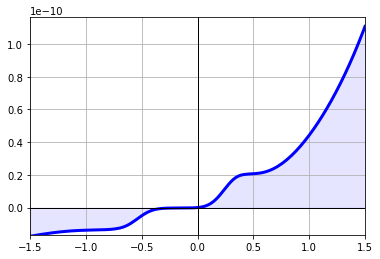

In [10]:
curr = iv(system, tip, sample, tme)
theory_plot(bias, curr)

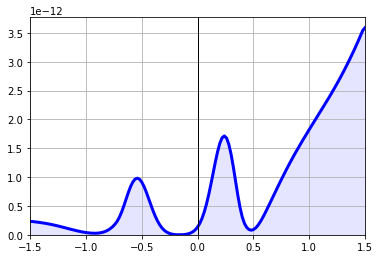

In [11]:
didv = np.gradient(curr)
theory_plot(bias, didv)

## 6 - Summary of the spectroscopy  <a class="anchor" id="sixth-bullet"></a>

In [12]:
summary_plot(system, tip, sample, tme, curr, didv)